<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

**Jawab:**

1.   Proses algoritma KNN:
     *   Tentukan jumlah data tetangga yang akan diperhitungkan (*k*).
     *   Hitung jarak setiap data tetangga terhadap data baru.
     *   Urutkan seluruh jarak mulai dari yang terkecil ke yang terbesar.
     *   Sesuaikan klasifikasi dari hasil pengukuran jarak.
     *   Gunakan kelas dengan jumlah terbanyak sebagai dasar menentukan kelas dari data baru.

2.   Kekurangan dari algoritma KNN:
     *   Perlu menunjukkan parameter *k* (jumlah tetangga terdekat).
     *   Tidak menangani nilai hilang (*missing value*) secara implisit.
     *   Sensitif terhadap data pencilan (*outlier*).
     *   Rentan terhadap variabel yang non-informatif.
     *   Rentan terhadap dimensionalitas yang tinggi.
     *   Biaya komputasi cukup tinggi karena diperlukan perhitungan jarak dari setiap sampel uji pada keseluruhan sampel latih.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def knn_train(n, weights):
    scores = []
    for n in range(n[0], n[1]+1):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weights)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    return scores

k_values = (2, 20)

list_uniform_score = knn_train(k_values, 'uniform')
list_distance_score = knn_train(k_values, 'distance')

print('Uniform Scores:', list_uniform_score)
print('Distance Scores:', list_distance_score)

Uniform Scores: [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]
Distance Scores: [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


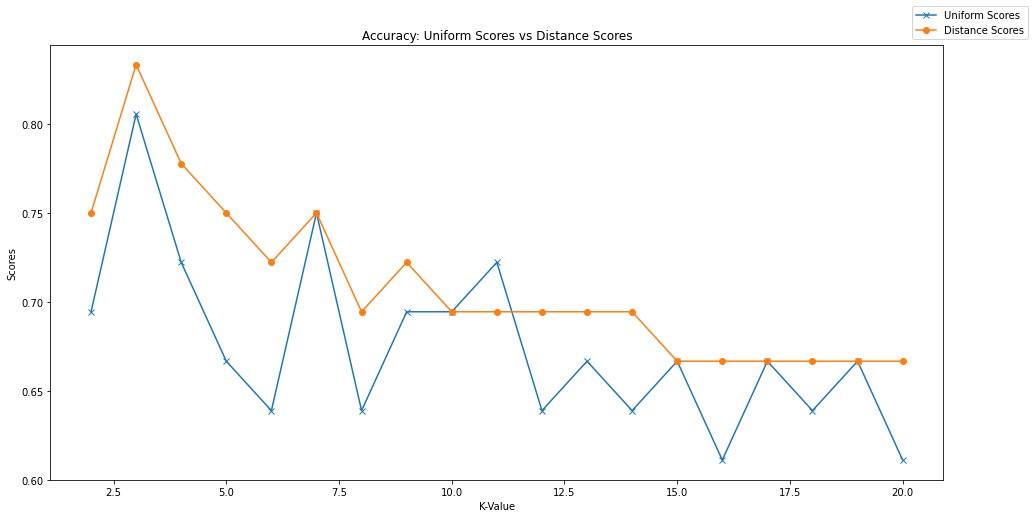

In [3]:
import matplotlib.pyplot as plt

x_k = np.arange(k_values[0], k_values[1]+1, 1)

fig = plt.subplots(figsize=(16, 8))
plt.plot(x_k, list_uniform_score, marker='x', label='Uniform Scores')
plt.plot(x_k, list_distance_score, marker='o', label='Distance Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), frameon=True)
plt.xlabel('K-Value')
plt.ylabel('Scores')
plt.title('Accuracy: Uniform Scores vs Distance Scores')
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [4]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print('coefficient of determination:', model.score(X, y))
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 1.0
intercept: 0.5000000016247981
slope: [ 1.5 -5.   9.  10. ]
